In [15]:
import xarray as xr
import os
from datetime import timedelta
import matplotlib.pyplot as plt


In [2]:
path = '//Users/anka/Desktop/research/msc25/data/cesm_StdModel'
file = 'b.e11.B20TRLENS_RCP85.f09_g16.xaer.002.cam.h0.CLOUD.192001-200512.nc'


In [3]:
ds = xr.open_dataset(os.path.join(path, file))
ds['time'] = ds.time.get_index('time') - timedelta(days=16) # correct time in the file, it should starts from Jan
# ds = ds.convert_calendar('standard')

In [4]:
cloud = ds.CLOUD.isel(lev=-1) # select the last level as fog
cloud

<xarray.DataArray 'CLOUD' (time: 1032, lat: 192, lon: 288)> Size: 228MB
[57065472 values with dtype=float32]
Coordinates:
    lev      float64 8B 992.6
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 8kB 1920-01-16 00:00:00 ... 2005-12-16 00:00:00
Attributes:
    mdims:         1
    units:         fraction
    long_name:     Cloud fraction
    cell_methods:  time: mean

In [9]:
cloud = cloud.assign_coords(month=("time", cloud['time'].dt.month.data))
cloud

<xarray.DataArray 'CLOUD' (time: 1032, lat: 192, lon: 288)> Size: 228MB
array([[[0.325447, 0.325447, ..., 0.325447, 0.325447],
        [0.310841, 0.309759, ..., 0.313897, 0.311923],
        ...,
        [0.655648, 0.656305, ..., 0.653241, 0.653737],
        [0.643058, 0.643058, ..., 0.643058, 0.643058]],

       [[0.497962, 0.497962, ..., 0.497962, 0.497962],
        [0.464288, 0.463362, ..., 0.469719, 0.46684 ],
        ...,
        [0.649539, 0.643861, ..., 0.653455, 0.6521  ],
        [0.69038 , 0.69038 , ..., 0.69038 , 0.69038 ]],

       ...,

       [[0.306552, 0.306552, ..., 0.306552, 0.306552],
        [0.240154, 0.238412, ..., 0.242291, 0.241074],
        ...,
        [0.489671, 0.490351, ..., 0.489663, 0.490745],
        [0.504437, 0.504437, ..., 0.504437, 0.504437]],

       [[0.595394, 0.595394, ..., 0.595394, 0.595394],
        [0.513526, 0.512221, ..., 0.520761, 0.516222],
        ...,
        [0.553941, 0.552759, ..., 0.555272, 0.554657],
        [0.601218, 0.601218, ..., 0.601218, 0.601218]]], dtype=float32)
Coordinates:
    lev      float64 8B 992.6
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 8kB 1920-01-16 00:00:00 ... 2005-12-16 00:00:00
    month    (time) int64 8kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    mdims:         1
    units:         fraction
    long_name:     Cloud fraction
    cell_methods:  time: mean

In [11]:
def select_season(data, months, season_name):
    # Filter by month
    season_data = data.where(data.month.isin(months), drop=True)
    
    # For DJF, we need to handle the year roll
    if season_name == 'DJF':
        # Drop December of the last year to avoid incomplete season
        season_data = season_data.sel(time=season_data['time'].dt.month != 12) if season_data.time[-1].dt.month == 12 else season_data
        
    return season_data

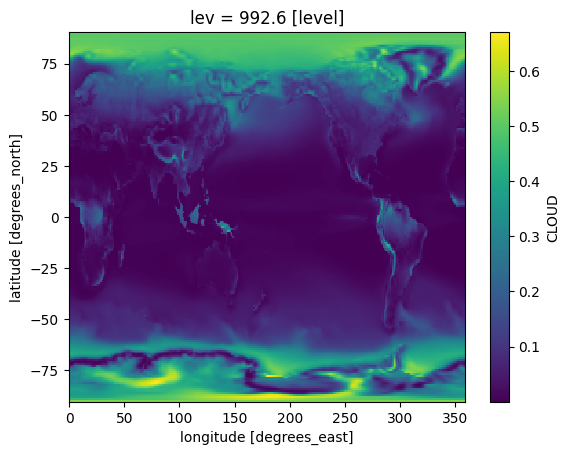

In [10]:
cloud.mean('time').plot() # what it looks like!

In [30]:
djf = select_season(cloud, [12, 1, 2], "DJF").mean("time")
mam = select_season(cloud, [3, 4, 5], "MAM").mean("time")
jja = select_season(cloud, [6, 7, 8], "JJA").mean("time")
son = select_season(cloud, [9, 10, 11], "SON").mean("time")

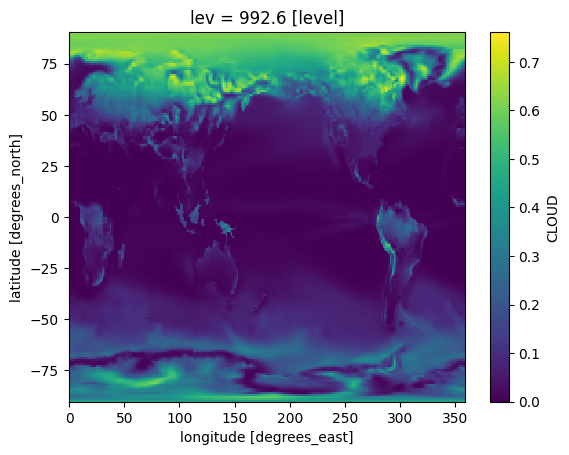

In [31]:
djf.plot()

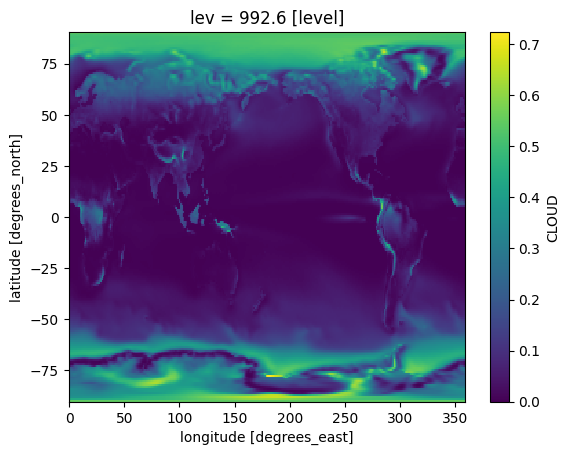

In [32]:
son.plot()

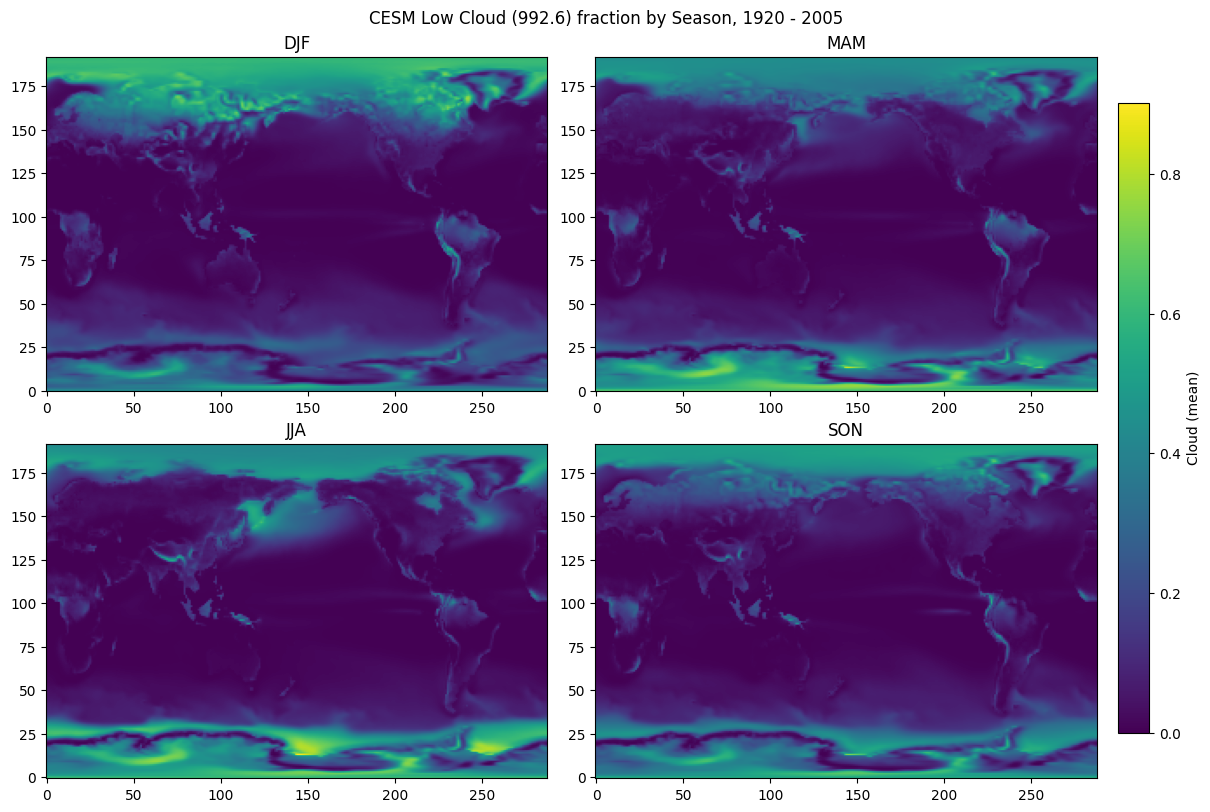

In [37]:
djf_data = djf.values
mam_data = mam.values
jja_data = jja.values
son_data = son.values

# Coordinates (for labeling)
lat = djf['lat'].values
lon = djf['lon'].values

fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
fig.suptitle("CESM Low Cloud (992.6) fraction by Season, 1920 - 2005")

# Set shared color range (optional)
vmin = min(djf_data.min(), mam_data.min(), jja_data.min(), son_data.min())
vmax = max(djf_data.max(), mam_data.max(), jja_data.max(), son_data.max())

# Plot manually
im0 = axs[0, 0].imshow(djf_data, origin='lower', vmin=vmin, vmax=vmax)
axs[0, 0].set_title("DJF")

im1 = axs[0, 1].imshow(mam_data, origin='lower', vmin=vmin, vmax=vmax)
axs[0, 1].set_title("MAM")

im2 = axs[1, 0].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax)
axs[1, 0].set_title("JJA")

im3 = axs[1, 1].imshow(son_data, origin='lower', vmin=vmin, vmax=vmax)
axs[1, 1].set_title("SON")

fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.03, pad=0.02, label='Cloud (mean)')

plt.show()